In [3]:
import os
import sys
os.chdir("C:/Users/nassa/OneDrive/Desktop/Git_Repos/ChE4230_Project/ChE4230/testing")
os.chdir("../")
os.getcwd()

'C:\\Users\\nassa\\OneDrive\\Desktop\\Git_Repos\\ChE4230_Project\\ChE4230'

In [4]:
import pandas as pd
import numpy as np
from source.data_preprocess import DataProcessing
from sklearn.preprocessing import StandardScaler
from source.DR_methods import DR
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [81]:
data = DataProcessing().load_data("../ChE4230/data/RawData.xlsx")
data_labels = pd.read_excel("../ChE4230/data/RawData_Label.xlsx").to_numpy()

   Unnamed: 0    XMEAS1       XMEAS2       XMEAS3    XMEAS4     XMEAS5  \
0           1  0.271033  3649.739415  4451.320791  9.223142  32.392900   
1           2  0.270826  3653.341885  4488.640140  9.211980  32.501953   
2           3  0.270474  3688.113265  4432.832766  9.235690  32.402838   
3           4  0.272127  3651.680041  4459.268940  9.192009  31.876790   
4           5  0.270939  3636.329271  4460.409756  9.277992  32.424754   

      XMEAS6       XMEAS7     XMEAS8      XMEAS9  ...       XMV3       XMV4  \
0  47.559754  2798.975799  64.995825  122.898796  ...  26.662173  60.482854   
1  47.374855  2800.296214  65.091251  122.877519  ...  26.689544  60.524644   
2  47.817088  2802.647777  64.812363  122.916165  ...  26.705507  60.546193   
3  47.869249  2803.693084  64.205417  122.892493  ...  26.768653  60.568588   
4  47.509322  2804.787223  64.598623  122.890514  ...  26.396773  60.637598   

   XMV5       XMV6       XMV7       XMV8  XMV9      XMV10      XMV11  XMV12  
0 

In [92]:
x_trainV, x_test, y_trainV, y_test = train_test_split(data,data_labels, test_size = 0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_trainV,y_trainV,test_size = 0.2, random_state=42)

print(y_train)

[[  35    2]
 [ 738    3]
 [ 157    2]
 ...
 [1527    8]
 [1496    8]
 [  20    2]]


In [83]:
scaler = StandardScaler()
scaler.fit(x_train)

train_scaled = scaler.transform(x_train)
test_scaled = scaler.transform(x_test)
print(np.shape(train_scaled))
print(np.shape(test_scaled))

(1276, 54)
(399, 54)


Text(0.5, 1.0, 'First Two Principle Components')

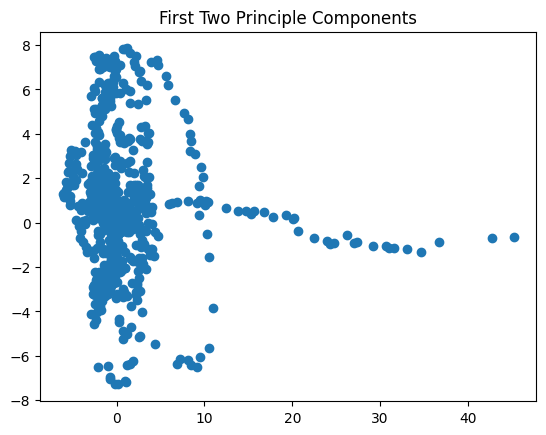

In [77]:
part_PCA = DR().dPCA(n = 2, data = train_scaled)
plt.scatter(part_PCA[:,0],part_PCA[:,1])
plt.title("First Two Principle Components")

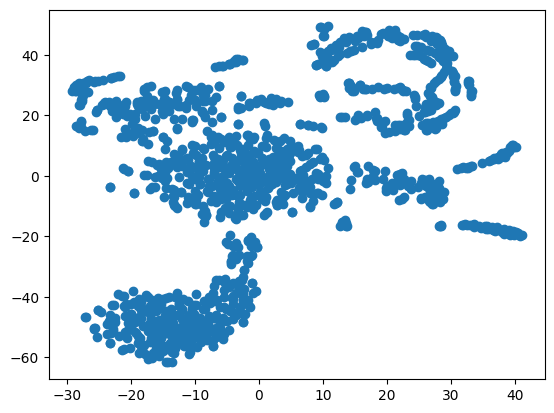

In [78]:
tSNE = DR().dtSNE(n = 2, data = train_scaled)
plt.scatter(tSNE[:,0], tSNE[:,1])

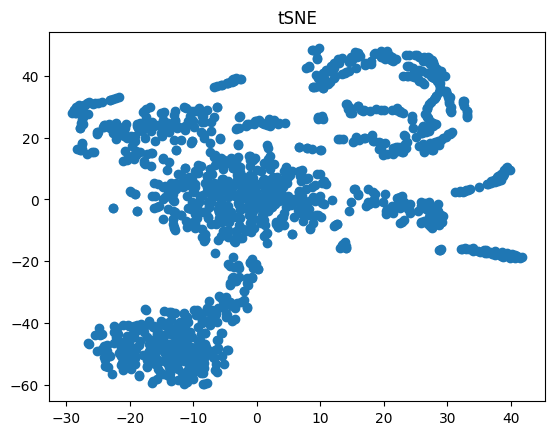

In [53]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2)
df_tsne = tsne.fit_transform(train_scaled)

plt.scatter(df_tsne[:,0], df_tsne[:,1])
plt.title("tSNE")
plt.show()

5


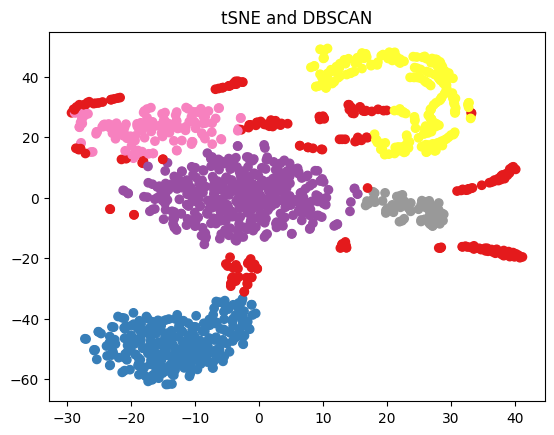

[2 3 2 ... 8 8 2]


In [94]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps = 6,min_samples = 40).fit(tSNE)

print(max(db.labels_) + 1)
dbscan_labels = np.array(db.labels_)

plt.scatter(tSNE[:,0], tSNE[:,1], c = db.labels_, cmap = "Set1")
plt.title("tSNE and DBSCAN")
plt.show()

#data_labels = pd.read_excel("C:/Users/nassa/OneDrive/Desktop/Git_Repos/ChE4230_Project/ChE4230/data/RawData_Label.xlsx").to_numpy()
#print(data_labels)
M,N = np.shape(y_train)
for i in range(M):
    dbscan_labels[i] = y_train[i,1]
print(dbscan_labels)



c:\Users\nassa\anaconda3\envs\ChE4230\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 1 3 ... 1 0 1]


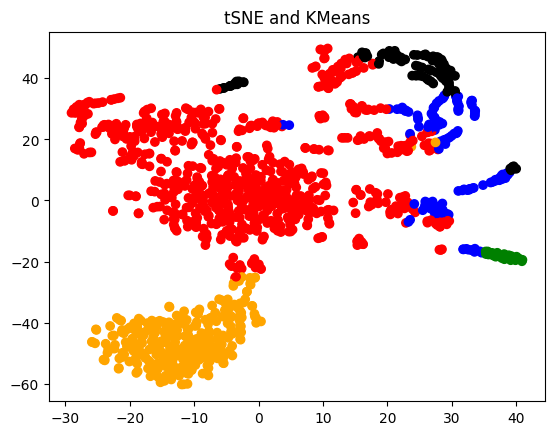

In [56]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters = 5, random_state= 1).fit(train_scaled)
print(kmean.labels_)
# colors for plotting
colors = ['blue', 'red', 'green', 'orange', 'black', 'brown']
# assign a color to each features (note that we are using features as target)
features_colors = [ colors[kmean.labels_[i]] for i in range(len(kmean.labels_)) ]

plt.scatter(tSNE[:,0], tSNE[:,1],c=features_colors,marker='o')
plt.title("tSNE and KMeans")
plt.show()